## Perguntas a serem respondidas:  
### Ação combativa
- Qual o impacto do recebimento do SMS em cada grupo?
  - Geral
  - Problemas de saúde
  - Idade

### Ação paliativa
- Qual a faixa etária mais assídua e a mais ausente? 
- Qual(is) o(s) bairro(s) de pessoas menos assíduas? 
- Quais os problemas de saúde das pessoas menos assíduas? 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('appointment_prediction_data.xlsx')

In [ ]:
df['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df.rename(columns={'No-show': 'Compareceu'}, inplace=True)

df['Gender'].replace({'Female':'F','Male':'M'}, inplace=True)

df['Neighbourhood'].replace({'RESIST√äNCIA':'RESISTÊNCIA','REP√öBLICA':'REPÚBLICA','S√ÉO PEDRO':'SÃO PEDRO',
                             'S√ÉO CRIST√ìV√ÉO':'SÃO CRISTÓVÃO','MARU√çPE':'MARUÍPE','GRANDE VIT√ìRIA':'GRANDE VITÓRIA',
                             'S√ÉO BENEDITO':'SÃO BENEDITO','SANTO ANDR√â':'SANTO ANDRÉ','ANT√îNIO HON√ìRIO':'ANTÔNIO HONÓRIO',
                             'M√ÅRIO CYPRESTE':'MARIO CYPRESTE','SANTO ANT√îNIO':'SANTO ANTONIO','PRAIA DO SU√Å':'PRAIA DO SUÁ',
                             'ITARAR√â':'ITARARA','INHANGUET√Å':'INHAGUETA','UNIVERSIT√ÅRIO':'UNIVERSITARIO',
                             'S√ÉO JOS√â':'SÃO JOSÉ','REDEN√á√ÉO':'REDENÇÃO','CARATO√çRA':'CARATOÍRA',
                             'ILHA DO PR√çNCIPE': 'ILHA DO PRÍNCIPE','ROM√ÉO': 'ROMÃO', 'FORTE S√ÉO JO√ÉO': 'FORTE SÃO JOÃO',
                             'JOANA D¬¥ARC': 'JOANA D\'ARC','CONSOLA√á√ÉO': 'CONSOLAÇÃO', 'SANTA CEC√çLIA': 'SANTA CECÍLIA',
                             'SANTA L√öCIA': 'SANTA LÚCIA','SANTA LU√çZA': 'SANTA LUÍZA', 'SEGURAN√áA DO LAR': 'SEGURANÇA DO LAR',
                             'Tabuazerio': 'TABUAZEIRO','ILHAS OCE√ÇNICAS DE TRINDADE': 'ILHAS OCEÂNICAS DE TRINDADE',
                             'ENSEADA DO SU√Å': 'ENSEADA DO SUÁ'}, inplace=True)
df['Neighbourhood'] = df.Neighbourhood.str.upper()

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

df.drop_duplicates(subset='AppointmentID', keep='first')

In [ ]:
attendance_percent = df['Compareceu'].mean()
attendance_percent

In [ ]:
df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Percentual de comparecimento 

In [ ]:
contagem_comparecimento = (df['Compareceu']==1).sum()
total_de_consultas = len(df['AppointmentID'])

foram_percent = (contagem_comparecimento/total_de_consultas)*100 
faltaram_percent = (100 - foram_percent)  

print(f'A assiduidade nas consultas foi de {foram_percent:.2f}%. Ausência de {faltaram_percent:.2f}%. ')

### percentual de ausencia pelo sexo biológico, coluna 'Gender'


In [ ]:
df.groupby('Gender')['Compareceu'].mean()

### percentual de ausencia entre os benificiários do bolsa família


In [ ]:
# percentual de ausencia entre os benificiários do bolsa família
df.groupby('Scholarship')['Compareceu'].mean()

### percentual de ausência entre o grupo PCD


In [ ]:
df['Handcap'].replace(to_replace = (2 ,3 ,4), value = 1 , inplace = True)
#df['Handcap'].value_counts()

df.groupby('Handcap')['Compareceu'].mean() # bronze

### percentual de ausência entre os pacientes com problemas com álcool


In [ ]:
# percentual de ausência entre os alcoólótras
df.groupby('Alcoholism')['Compareceu'].mean()

### percentual de ausência entre os diabéticos


In [ ]:
# percentual de ausência entre os diabéticos
df.groupby('Diabetes')['Compareceu'].mean() # medalha de prata em assiduidade

### percentual de ausência entre os hipertensos


In [ ]:
# percentual de ausência entre os hipertensos
df.groupby('Hipertension')['Compareceu'].mean() # campeões em assiduidade

### Percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS


In [ ]:
# percentual de ausência entre os pacientes que receberam mensagem de lembrete pelo SMS
df.groupby('SMS_received')['Compareceu'].mean()

# percebe-se que quem recebe sms tende a faltar mais do que o grupo q não recebeu

## Faixa etária


In [ ]:
#criar uma coluna de faixa etária
df['Faixa etaria']=pd.cut(df['Age'], bins=[-1,12,18,30,60,125], labels=['Crianças','Adolescentes','Adultons Jovens','Adultos','Idosos'])


In [ ]:
# verifica criação de nova coluna faixa etária
df.head()

 ### Qual a faixa etária mais assídua e a mais ausente? 

In [ ]:
# agrupa em ordem decrescente a assiduidade por faixa etária
df.groupby('Faixa etaria')['Compareceu'].mean().sort_values(ascending=False)

### qual faixa etária é mais acometida com problemas com álcool? 


In [ ]:
df.groupby('Faixa etaria')['Alcoholism'].mean().sort_values(ascending=False)

### qual faixa etária é mais acometida pelo diabetes? 


In [ ]:
df.groupby('Faixa etaria')['Diabetes'].mean().sort_values(ascending=False)

### qual faixa etária é mais acometida pelo hipertensão? 

In [ ]:
df.groupby('Faixa etaria')['Hipertension'].mean().sort_values(ascending=False)

# Bairros: 

### Qual(ais) bairros mais assíduos ? 

In [ ]:
df.groupby('Neighbourhood')['Compareceu'].mean().sort_values(ascending=False)
# Os últimos são os bairros de pacientes com maior ausência em consultas

###  Qual(is) bairro(s) detém maior número de beneficiários do programa Bolsa família?


In [ ]:
df.groupby('Neighbourhood')['Scholarship'].mean().sort_values(ascending=False)


### Qual(is) bairro(s) detém maior número de pacientes com problemas com álcool? 

In [ ]:
df.groupby('Neighbourhood')['Alcoholism'].mean().sort_values(ascending=False)


### Qual(is) bairro(s) detém maior número de hipertensos? 

In [ ]:
df.groupby('Neighbourhood')['Hipertension'].mean().sort_values(ascending=False)


### Qual(is) bairro(s) detém maior número de diabéticos? 

df.groupby('Neighbourhood')['Diabetes'].mean().sort_values(ascending=False)


## Em comparação ao grupo não-PCD, o grupo com deficiência compareceu mais nas consultas.

In [ ]:
df.groupby(['Handcap'])['Compareceu'].mean() 

### Quantas consultas foram marcadas para cada especialidade?

In [ ]:

df_pcd = df.loc[df['Handcap']==1]


hipertensos_pcd = df_pcd.loc[df_pcd['Hipertension']==1]
alcolismo_pcd = df_pcd.loc[df_pcd['Alcoholism']==1]
diabetes_pcd = df_pcd.loc[df_pcd['Diabetes']==1]

print(f'Foram {len(alcolismo_pcd)} consultas marcadas para Alcoolismo no grupo PCD')
print(f'Foram {len(diabetes_pcd)} consultas marcadas para Diabetes no grupo PCD')
print(f'Foram {len(hipertensos_pcd)} consultas marcadas para Hipertensão no grupo PCD')


### Qual gênero compareceu mais nas consultas marcadas no grupo PCD? Genero Masculino


In [ ]:
df_pcd.groupby('Gender')['Compareceu'].mean()

### Qual a faixa etária que mais compareceu nas consultas marcadas?

In [ ]:
df_pcd['Faixa etaria'] = pd.cut(df_pcd['Age'],bins=[-1,12,18,30,60,125],labels=['Crianças','Adolescentes','Jovens Adultos','Adultos','Idosos'])
df_pcd.groupby(['Faixa etaria'])['Compareceu'].mean().sort_values(ascending=False)

## No geral, incluindo TODAS as consultas, até as imediatas, receber o sms não impactou o grupo PCD, porém se isolarmos as consultas imediatas vemos que sim teve uma pequena diferença, e vamos ver isso mais a frente.

In [ ]:
df_pcd.groupby(['SMS_received'])['Compareceu'].mean()

## Alocando as respostas de comparecimentos em grupos de:
### Recebeu o sms - 1. Não recebeu o sms - 0.<br>

## E separando o grupo por consultas realizadas a partir de 3 dias de marcação temos os seguintes resultados:

### No grupo de consultas marcadas para "Diabetes" houve um aumento de 7% no comparecimento de quem recebeu o lembrete por sms.

In [ ]:

sms_diabetes_pcd = diabetes_pcd.loc[(diabetes_pcd['time_delta']>2)]
sms_diabetes_pcd.groupby(['SMS_received'])['Compareceu'].mean()

### No grupo de consultas marcadas para "Hipertensão" houve um aumento de 8% no comparecimento de quem recebeu o lembrete por sms. 

In [ ]:

sms_hipertensao = hipertensos_pcd.loc[(hipertensos_pcd['time_delta']>2)]
sms_hipertensao.groupby(['SMS_received'])['Compareceu'].mean()

### No grupo de consultas marcadas para "Alcoolismo" receber SMS não fez diferença.


In [ ]:
sms_alcolismo_pcd = alcolismo_pcd.loc[(alcolismo_pcd['time_delta']>2)]
sms_alcolismo_pcd.groupby(['SMS_received'])['Compareceu'].mean()

### Será que com o tempo mais longo de espera de consulta há mais ausência de deficientes? 
### O nível de comparecimento é alto nos primeiros dias, mas quanto mais longe da data a consulta é marcada, as taxas de comparecimento diminuem.

In [ ]:
df_pcd.pivot_table(index='time_delta', aggfunc='count', values='Compareceu').plot(kind='bar', xticks= (np.arange(0,60,30)), title = 'Comparecimento por tempo de espera pela consulta', xlabel = 'Dias depois da marcação')

#### Solução: Quanto mais cedo as consultas forem marcadas, e tendo sido reforçados os lembretes por sms, a taxa de AUSÊNCIA do grupo PCD diminuirá.

# Data de agendamento:
O objetivo é avaliar a relação entra a data de agendamento e a assiduidade dos pacientes, visando criar um indicador para estabelecimento de um perfil propenso a não comparecer as consultas

In [108]:
df_aux = pd.read_excel('appointment_prediction_data.xlsx')
df_aux['No-show'].replace({'Yes': 0, 'No': 1}, inplace=True)

df_aux.rename(columns={'No-show': 'Compareceu'}, inplace=True)

In [ ]:
df_aux

In [109]:
df_aux['ScheduledDay'] = pd.to_datetime(df_aux['ScheduledDay'])
df_aux['ScheduledDay_aux'] = pd.to_datetime(df_aux['ScheduledDay']).dt.date
df_aux['AppointmentDay_aux'] = pd.to_datetime(df_aux['AppointmentDay']).dt.date
df_aux['time_delta'] = (df_aux['AppointmentDay_aux'] - df_aux['ScheduledDay_aux']).dt.days
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,ScheduledDay_aux,AppointmentDay_aux,time_delta
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27 09:24:46+00:00,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-04-27,2016-06-03,37
110569,3.134163e+12,5768536,F,2016-06-03 07:42:27+00:00,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0
110570,6.846652e+12,5768917,M,2016-06-03 08:10:22+00:00,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0
110571,8.222960e+11,5772302,F,2016-06-03 15:06:15+00:00,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-06-03,2016-06-07,4


In [110]:
#Extração da hora em que foi agendada a consulta
df_aux['ScheduledHour'] = df_aux.ScheduledDay.dt.strftime("%H")
df_aux

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,ScheduledDay_aux,AppointmentDay_aux,time_delta,ScheduledHour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,2016-04-29,0,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,2016-04-29,0,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,2016-04-29,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110568,8.567868e+12,5627377,F,2016-04-27 09:24:46+00:00,2016-06-03T00:00:00Z,20.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-04-27,2016-06-03,37,09
110569,3.134163e+12,5768536,F,2016-06-03 07:42:27+00:00,2016-06-03T00:00:00Z,53.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0,07
110570,6.846652e+12,5768917,M,2016-06-03 08:10:22+00:00,2016-06-03T00:00:00Z,51.0,RESIST√äNCIA,0,0,0,0,0,0,1,2016-06-03,2016-06-03,0,08
110571,8.222960e+11,5772302,F,2016-06-03 15:06:15+00:00,2016-06-07T00:00:00Z,19.0,RESIST√äNCIA,0,0,0,0,0,1,1,2016-06-03,2016-06-07,4,15


Com base no gráfico abaixo é possível notar que pessoas que agendaram suas consultas no perído da manhã foram as mais assíduas

<AxesSubplot:xlabel='ScheduledHour'>

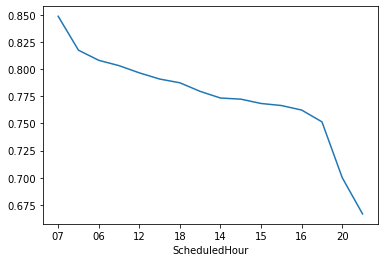

In [111]:
#Verificação da assiduidade por hora
df_aux.groupby('ScheduledHour')['Compareceu'].mean().sort_values(ascending=False).plot()

Com base no gráfico abaixo é possível notar que pessoas que agendaram suas consultas no sábado foram as mais assíduas

<AxesSubplot:xlabel='ScheduledWeekDay'>

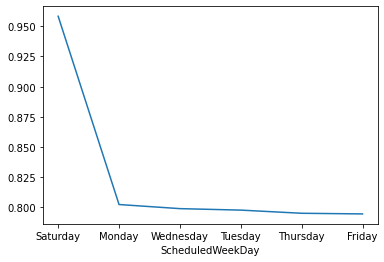

In [112]:
#Extração do dia da semana que foram realizadas os agendamentos
df_aux['ScheduledWeekDay'] = df_aux.ScheduledDay.dt.day_name()
df_aux.groupby('ScheduledWeekDay')['Compareceu'].mean().sort_values(ascending=False).plot()

Afim de validar se o comportamento se repete desocnsiderando possíveis casos de emergências (consultas agendadas e realizadas no mesmo dia), refizemos a análise eliminando esses casos e podemos notar que o mesmo se repete

In [113]:
df_filtrado = df_aux[df_aux.time_delta > 0].copy()

<AxesSubplot:xlabel='ScheduledHour'>

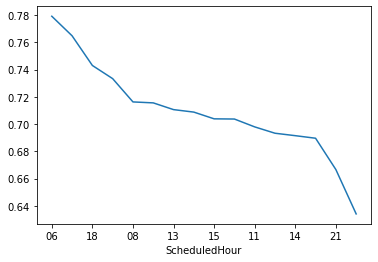

In [114]:
#Extração da hora em que foi agendada a consulta
df_filtrado['ScheduledHour'] = df_filtrado.ScheduledDay.dt.strftime("%H")
df_filtrado.groupby('ScheduledHour')['Compareceu'].mean().sort_values(ascending=False).plot()

<AxesSubplot:xlabel='ScheduledWeekDay'>

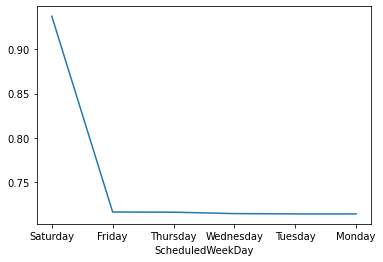

In [115]:
df_filtrado['ScheduledWeekDay'] = df_filtrado.ScheduledDay.dt.day_name()
df_filtrado.groupby('ScheduledWeekDay')['Compareceu'].mean().sort_values(ascending=False).plot()